In [106]:
# Preamble script block to identify host, user, and kernel
import sys
! hostname
! whoami
print(sys.executable)
print(sys.version)
print(sys.version_info)
! pwd

atomickitty.aws
engr1330content
/opt/conda/envs/python/bin/python
3.8.3 (default, Jul  2 2020, 16:21:59) 
[GCC 7.3.0]
sys.version_info(major=3, minor=8, micro=3, releaselevel='final', serial=0)
/home/engr1330content/engr-1330-webroot/1-Lessons/Lesson13/PsuedoLesson


In [107]:
%%html
<!--Script block to left align Markdown Tables-->
<style>
  table {margin-left: 0 !important;}
</style>

# ENGR 1330 Computational Thinking with Data Science 
Last GitHub Commit Date: 2 Mar 2021

## Lesson 13 : Data Modeling with Special Functions (Probability Distributions)

<!--![](http://54.243.252.9/engr-1330-psuedo-course/CECE-1330-PsuedoCourse/1-Lessons/Lesson13/PsuedoLesson/roulette.png)-->

## Objectives
- To understand the fundamental concepts involved in representing a data collection;
  - Interpolation
  - Extrapolation
  - Concept of a fitting function
- Introduce select special functions
  - Normal distribution function
  - Gamma distribution function
  - Extreme value distribution function
  - Pearson Type 3 distribution function
  

---

## Computational Thinking Concepts
The CT concepts include:

- Decomposition => Assert data are drawn from some process that is functionally explainable
- Abstraction => Represent data behavior with a function 
- Algorithm Design =>  Use the function to predict "new" values of observations



---

## Explaining Data
Recall our speed and time example, repeated below.

In [125]:
# Our data
time = [0,1.0,2.0,3.0,4.0,5.0,6.0]
speed = [0,3,7,12,20,30,45.6]

In [126]:
# Our model
def poly1(b0,b1,x):
    # return y = b0 + b1*x
    poly1=b0+b1*x
    return(poly1)

In [127]:
# Our plotting function
import matplotlib.pyplot as plt
def make2plot(listx1,listy1,listx2,listy2,strlablx,strlably,strtitle):
    mydata = plt.figure(figsize = (10,5)) # build a square drawing canvass from figure class
    plt.plot(listx1,listy1, c='red', marker='v',linewidth=0) # basic data plot
    plt.plot(listx2,listy2, c='blue',linewidth=1) # basic model plot
    plt.xlabel(strlablx)
    plt.ylabel(strlably)
    plt.legend(['Data','Model'])# modify for argument insertion
    plt.title(strtitle)
    plt.show()

In [141]:
# Our "fitting" process
intercept = -5.0
slope = 9.0
modelSpeed = [] # empty list
for i in range(len(time)):
    modelSpeed.append(poly1(intercept,slope,time[i]))

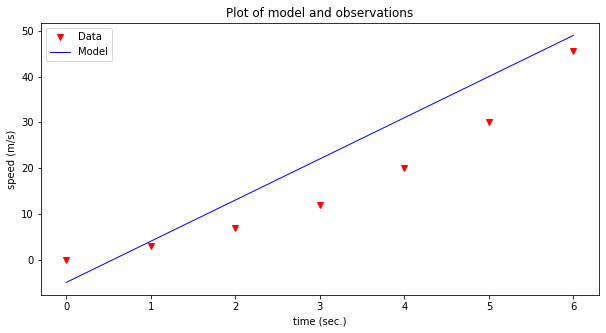

In [142]:
# Plotting results
make2plot(time,speed,time,modelSpeed,'time (sec.)','speed (m/s)','Plot of model and observations')

We are limited in the ability to fit the data because our representation function is limited to a straight line, now lets make a quadratic a possible model option.

In [113]:
# Our new model
def poly2(b0,b1,b2,x):
    # return y = b0 + b1*x + b2*x**2
    poly2=b0+(b1+b2*x)*x  # faster than b0 + b1*x + b2*x**2
    return(poly2)

Now try fitting and plotting using our new model and should get indetical result, then we can explore using the new parameter b2

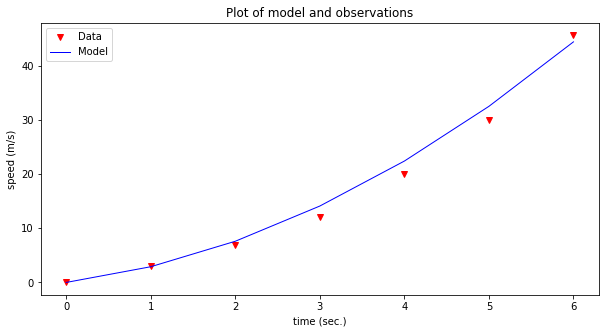

In [148]:
# Our "fitting" process
intercept = 0.0      # set to 0.0
slope = 2.0          # adjust to 2.0
curvature = 0.9    # adjust to 0.9 
modelSpeed = [] # empty list
for i in range(len(time)):
    modelSpeed.append(poly2(intercept,slope,curvature,time[i]))
# Plotting results
make2plot(time,speed,time,modelSpeed,'time (sec.)','speed (m/s)','Plot of model and observations')

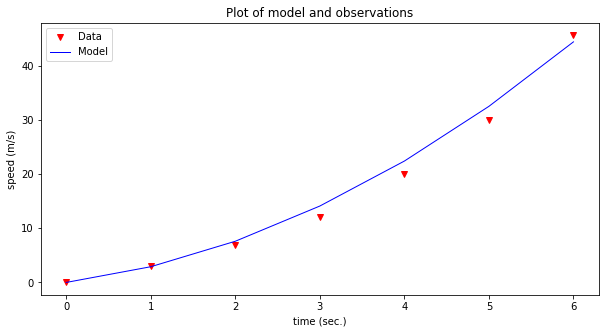

In [149]:
# Our "fitting" process
intercept = 0.0      # set to 0.0
slope = 2.0          # adjust to 2.0
freddykruger = 0.9      # adjust to 0.9 
modelSpeed = [] # empty list
for i in range(len(time)):
    modelSpeed.append(poly2(intercept,slope,freddykruger,time[i]))
# Plotting results
make2plot(time,speed,time,modelSpeed,'time (sec.)','speed (m/s)','Plot of model and observations')

Now which "model" is more useful for these data?  Explain your reasoning.

Lets take a look over the process we just implemented

1. Prepare our data series 
1. Select a function type as the data model (in this case polynomials of order 1 and 2)
2. Use a plotting tool to plot observed data (red) and our model (blue)
3. Adjust model parameters (b0,b1,b2, ...) to get the blue model to pass through the red dots as best we can.

That's it, later we will explore ways to quantify the fit, which will help us choose a data model when multiple models appear good.




In [116]:
## Now lets apply our tools to different data, first we will read data from a file

In [150]:
amatrix = []
xvalue = []
yvalue = []
rowNumA = 0
file1 = open("MyFile.txt", "r")  # get the data
for line in file1:
    amatrix.append([float(n) for n in line.strip().split()])
    rowNumA += 1
file1.close() # Disconnect the file
for i in range(len(amatrix)): # deconstruct the list, rename each column
    xvalue.append(amatrix[i][0])
    yvalue.append(amatrix[i][1])

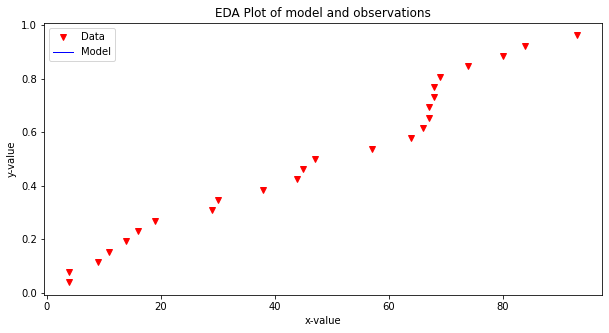

In [151]:
make2plot(xvalue,yvalue,[],[],'x-value','y-value','EDA Plot of model and observations')

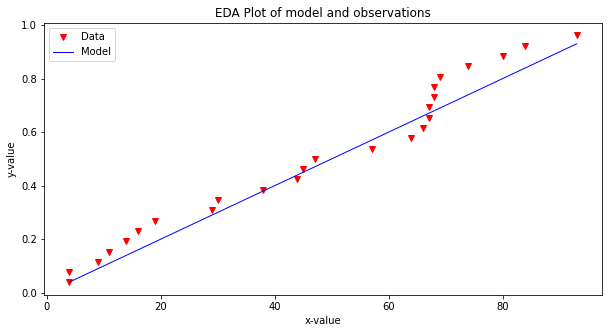

In [173]:
# Our "fitting" process
intercept = 0.0      # 0.0
slope = 0.01     # 0.018
curvature = 0     # -0.0001 
modelY = [] # empty list
for i in range(len(xvalue)):
    modelY.append(poly2(intercept,slope,curvature,xvalue[i]))
# Plotting results
make2plot(xvalue,yvalue,xvalue,modelY,'x-value','y-value','EDA Plot of model and observations')

Lets build a different type of data model, here we will use a special function called the normal distribution function. A useful notation using the Normal density function as an example is:

$$ \text{pdf(x)} = \frac{1}{\sigma \sqrt{2\pi}} \times exp (-\frac{(x-\mu)^2}{2 \sigma^2}) $$

In the function, $x$ is the random variable, $\mu$ is the **population** mean and $\sigma^2$ is the **population** variance.  These parameters ($\mu$, and $\sigma^2$) play the same role that $b_0,b_1,b_2, \dots$ play in our polynomial model - they simply adjust shape of the model.

Often we don't actually know the population values so we estimate them from the collection of observations, in this context these are called the **sample** mean and variance.   Computation of the **sample** values is done using methods described in the lesson on descriptive statistics.

The integral of the $ \text{pdf(x)} $ from $-\infty~to ~ X $, produces a result called the cumulative distribution function.  The value $ X $ is not a random variable, but the integral value of the probability of the random variable $x$ being less than or equal to $X$.

A useful notation using the Normal distribution as an example is:

$$ F(X) =  \int_{-\infty}^X{\frac{1}{\sigma \sqrt{2\pi}} \times exp (-\frac{(x-\mu)^2}{2 \sigma^2}) dx}$$

For the Normal distribution the integral is a special function called the Error function and can be written as:

$$ F(X) =  \frac{1}{2} \cdot (1+erf(\frac{(X-\mu)}{\sqrt{2} \sigma}))$$

We will use these concepts to build an alternative to `poly1` and `poly2` as data models.

## Normal Distribution Model (Using Math Package)

Here we will build a normal distribution model, essentially the functions for the above equations, and then will plot them.


In [161]:
import math

def normdensity(x,mu,sigma):
    weight = 1.0 /(sigma * math.sqrt(2.0*math.pi))
    argument = ((x - mu)**2)/(2.0*sigma**2)
    normdensity = weight*math.exp(-1.0*argument)
    return normdensity

def towlie(x,mu,sigma):
    argument = (x - mu)/(math.sqrt(2.0)*sigma)    
    normdist = (1.0 + math.erf(argument))/2.0
    return normdist

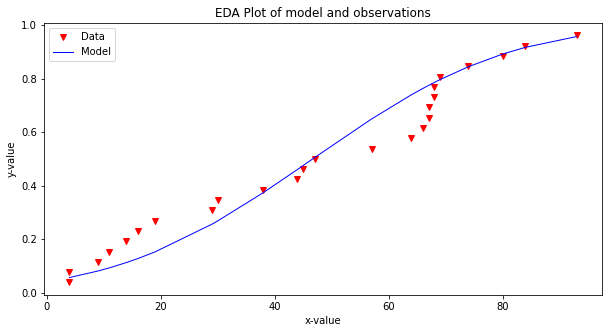

In [180]:
# Our "fitting" process
mu = 46.68      # 50.0
sigma = 26.97   # 850.01**0.5
modelY = [] # empty list
for i in range(len(xvalue)):
    modelY.append(towlie(xvalue[i],mu,sigma))
# Plotting results
make2plot(xvalue,yvalue,xvalue,modelY,'x-value','y-value','EDA Plot of model and observations')

In [179]:
import numpy
#numpy.mean(xvalue)
numpy.std(xvalue)

26.978094817833227

### Interpolation
Lets return to our time/speed model and estimate the speed at 4.5 seconds

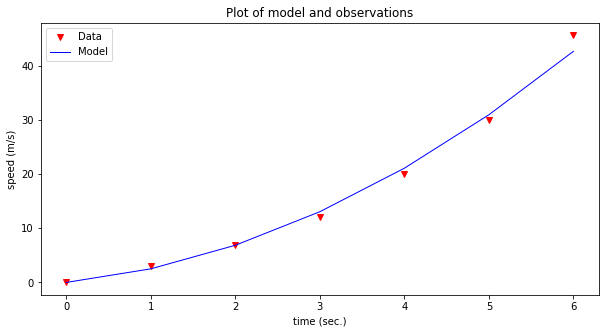

In [189]:
# Our "fitting" process
intercept = 0.0      # set to 0.0
slope = 1.590          # adjust to 2.0
curvature = 0.92      # adjust to 0.9 
modelSpeed = [] # empty list
for i in range(len(time)):
    modelSpeed.append(poly2(intercept,slope,curvature,time[i]))
# Plotting results
make2plot(time,speed,time,modelSpeed,'time (sec.)','speed (m/s)','Plot of model and observations')

In [182]:
print('Speed estimate at time ',4.5,'is ',poly2(intercept,slope,curvature,4.5))

Speed estimate at time  4.5 is  27.224999999999998


### Extrapolation

In [190]:
print('Speed estimate at time ',9.5,'is ',poly2(intercept,slope,curvature,9.5))

Speed estimate at time  9.5 is  98.135


## References:

0. Jamie Chan (2014) Learn Python in One Day and Learn It Well. LCF Publishing. Kindle Edition. http://www.learncodingfast.com/python

1. Grus, Joel. Data Science from Scratch: First Principles with Python. O'Reilly Media. Kindle Edition. (http://safaribooksonline.com)

2. Christian, B, and Griffiths Tom (2016) Algorithms to live by: The computer science of human decisions. Henry Holt and Company, ISBN 9781627790369 (hardcover)|ISBN 9781627790376 (electronic book)

3. https://www.amazon.com/Distributional-Statistics-Environment-Statistical-Computing/dp/1463508417 

4. https://www.inferentialthinking.com/chapters/10/Sampling_and_Empirical_Distributions.html

5. https://www.inferentialthinking.com/chapters/15/Prediction.html